In [47]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from viz_utils import *
from train_utils import *
from input_prep import *
from traj_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Seq from real

In [48]:
sorted(glob.glob("/media/beans/ssd/bespoke_logging/*"))
#sorted(glob.glob("/home/beans/bespoke_logging/*"))

['/media/beans/ssd/bespoke_logging/run_351',
 '/media/beans/ssd/bespoke_logging/run_352',
 '/media/beans/ssd/bespoke_logging/run_353',
 '/media/beans/ssd/bespoke_logging/run_354',
 '/media/beans/ssd/bespoke_logging/run_355',
 '/media/beans/ssd/bespoke_logging/run_356',
 '/media/beans/ssd/bespoke_logging/run_357',
 '/media/beans/ssd/bespoke_logging/run_358',
 '/media/beans/ssd/bespoke_logging/run_359',
 '/media/beans/ssd/bespoke_logging/run_359a',
 '/media/beans/ssd/bespoke_logging/run_359b',
 '/media/beans/ssd/bespoke_logging/run_360',
 '/media/beans/ssd/bespoke_logging/run_361',
 '/media/beans/ssd/bespoke_logging/run_362',
 '/media/beans/ssd/bespoke_logging/run_363',
 '/media/beans/ssd/bespoke_logging/run_364',
 '/media/beans/ssd/bespoke_logging/run_365',
 '/media/beans/ssd/bespoke_logging/run_366',
 '/media/beans/ssd/bespoke_logging/run_367',
 '/media/beans/ssd/bespoke_logging/run_368',
 '/media/beans/ssd/bespoke_logging/run_369',
 '/media/beans/ssd/bespoke_logging/run_370',
 '/media

In [49]:
##run_id = "run_494" # to mid nabq and back via timber trail, silver falls highway, quall, madrona, ev. Cloudy.  
##run_id = "run_498" # back from end nabq via tt, pc, sfh, quall, madrona
#run_id = "run_502" # out to nabq start
#run_id = "run_503" # nabq out
# run_id = "run_504" # back from nabq
#run_id = "run_511"
run_id = "run_513" # out and back from nabq

run_path = f"/media/beans/ssd/bespoke_logging/{run_id}"
#run_path = f"/home/beans/bespoke_logging/{run_id}"

model_stem = "9.24_avg" #"8.18_e34" nabq back on tt sfh

In [50]:
aux_paths = sorted(glob.glob(f"{run_path}/aux/*"))
img_paths = sorted(glob.glob(f"{run_path}/img/*"))
car_state_paths = sorted(glob.glob(f"{run_path}/car_state/*"))
m = min([len(aux_paths), len(img_paths), len(car_state_paths)])
len(aux_paths), len(img_paths), len(car_state_paths), m

(41042, 41042, 41042, 41042)

In [51]:
s, e = 0, -100 #-100 #9400, 11_400 #4000
#e = m

aux = np.stack([np.load(f) for f in aux_paths[s:e]]).astype(np.float16)
img = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/img/*"))[s:e]]).astype(np.uint8)
car_state = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/car_state/*"))[s:e]])#.astype(np.float16)

steer_angle = np.radians(car_state[:,0] / (STEER_RATIO)) #*-1  
tire_angle_rad = steer_angle *-1
img.shape, aux.shape, car_state.shape

((40942, 120, 640, 3), (40942, 5), (40942, 16))

In [52]:
#img = img[:,20:,:,:]
img.shape

(40942, 120, 640, 3)

In [53]:
commanded_torque = car_state[:, 7]

array([8.0000e+00, 2.9000e+01, 2.7000e+01, 8.0000e+01, 6.4800e+02,
       1.9913e+04, 1.9826e+04, 3.6600e+02, 2.6000e+01, 1.9000e+01])

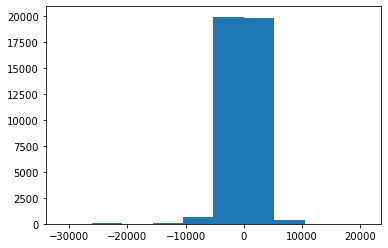

In [54]:
plt.hist(commanded_torque)[0]

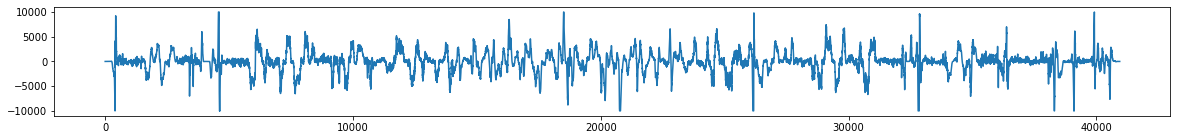

In [55]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_torque, -10_000, 10_000))

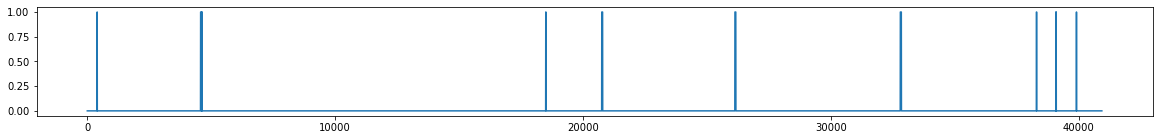

In [56]:
# abs torque limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 9])

array([1.0000e+00, 3.0000e+00, 0.0000e+00, 1.1000e+01, 2.0449e+04,
       2.0453e+04, 2.0000e+01, 1.0000e+00, 1.0000e+00, 3.0000e+00])

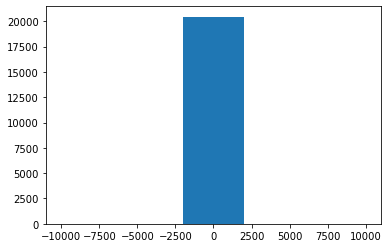

In [57]:
commanded_td = car_state[:, 8]
plt.hist(np.clip(commanded_td, -10_000, 10_000))[0]

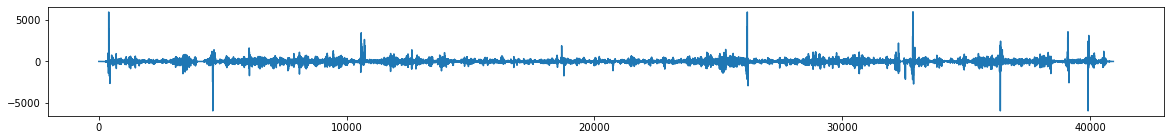

In [58]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_td, -6000, 6000))

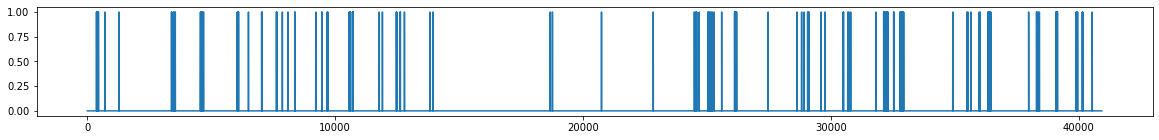

In [59]:
# Td limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 10])

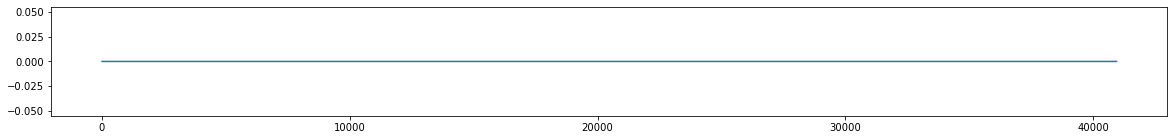

In [60]:
# interesting note
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 11])

In [61]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(car_state[:, 10], width=900, height=400)
fig.show()

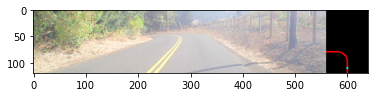

In [62]:
plt.imshow(img[2589])

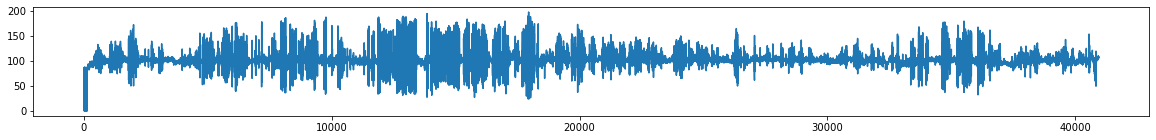

In [63]:
# seeing if cam is too slow, ie if we ever have repeated imgs

diffs = []
for i in range(len(img)-1):
    diff = (img[i] - img[i+1]).mean()
    diffs.append(diff)
    
# whether or not image is same as prev img, ie cam is slow. We just don't want to see zeros
plt.figure(figsize=(20,2))
plt.plot(diffs)

(array([4.9000e+01, 1.7304e+04, 1.8146e+04, 3.7520e+03, 1.3380e+03,
        2.2900e+02, 7.3000e+01, 1.2000e+01, 2.3000e+01, 7.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([15.  , 16.15, 17.3 , 18.45, 19.6 , 20.75, 21.9 , 23.05, 24.2 ,
        25.35, 26.5 , 27.65, 28.8 , 29.95, 31.1 , 32.25, 33.4 , 34.55,
        35.7 , 36.85, 38.  ]),
 <BarContainer object of 20 artists>)

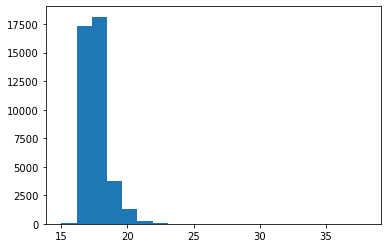

In [64]:
# timespan btwn start to get img, and publish plan, ie the timespan WE have control over
# img staleness
plt.hist(car_state[:,2], bins=20)

In [65]:
b,e = 0, -1
img = img[b:e]
aux = aux[b:e]
car_state = car_state[b:e]
steer_angle = steer_angle[b:e]
img.shape, aux.shape, car_state.shape, steer_angle.shape, #pred.shape

((40941, 120, 640, 3), (40941, 5), (40941, 16), (40941,))

(array([  707.,  1750.,  2491.,  3245., 21198.,  5459.,  3273.,  1885.,
          737.,   196.]),
 array([-6140.74976921, -4821.07479229, -3501.39981537, -2181.72483845,
         -862.04986153,   457.62511539,  1777.30009232,  3096.97506924,
         4416.65004616,  5736.32502308,  7056.        ]),
 <BarContainer object of 10 artists>)

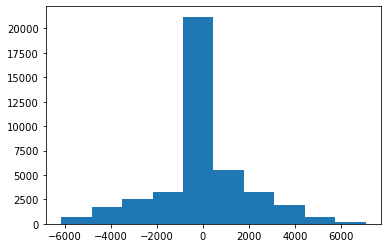

In [66]:
torque = np.degrees(steer_angle) * (aux[:,2]**2)
plt.hist(torque)

(array([1.0000e+00, 1.6000e+01, 1.5600e+02, 1.3510e+03, 2.8333e+04,
        1.0284e+04, 6.6100e+02, 1.1300e+02, 1.9000e+01, 6.0000e+00]),
 array([-719.64998609, -571.68496459, -423.71994309, -275.7549216 ,
        -127.7899001 ,   20.1751214 ,  168.14014289,  316.10516439,
         464.07018589,  612.03520738,  760.00022888]),
 <BarContainer object of 10 artists>)

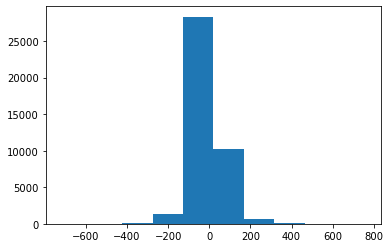

In [67]:
plt.hist(torque[1:]-torque[:-1])

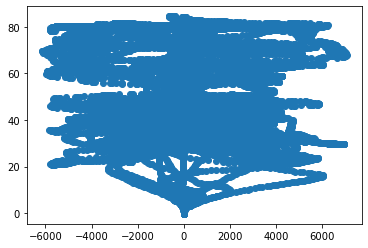

In [68]:
plt.scatter(torque, aux[:,2])

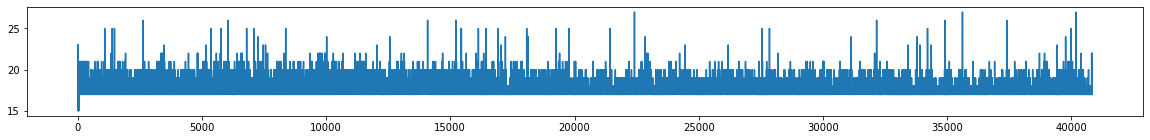

In [69]:
# img staleness
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,2])

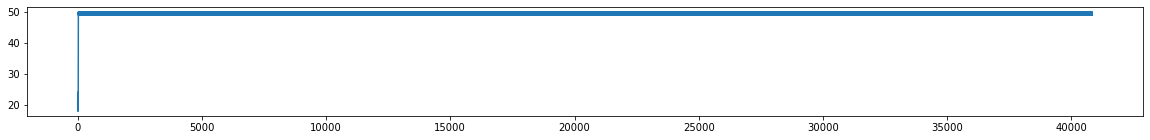

In [70]:
# loop duration
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,3])

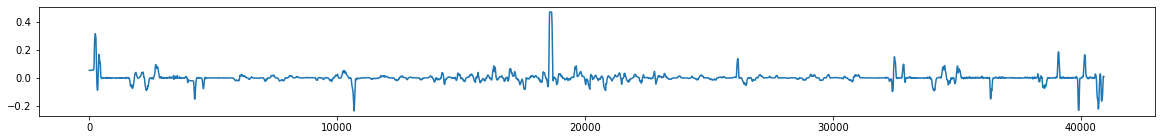

In [71]:
# steer angle
plt.figure(figsize=(20,2))
plt.plot(steer_angle)

In [72]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=range(len(steer_angle)), y=steer_angle, width=900, height=400)
fig.show()

(array([1.4200e+02, 2.7500e+02, 2.6000e+03, 3.6297e+04, 1.1590e+03,
        2.5400e+02, 3.1000e+01, 6.6000e+01, 9.0000e+00, 1.0800e+02]),
 array([-0.2339832 , -0.16378824, -0.09359328, -0.02339832,  0.04679664,
         0.1169916 ,  0.18718656,  0.25738152,  0.32757648,  0.39777144,
         0.46796641]),
 <BarContainer object of 10 artists>)

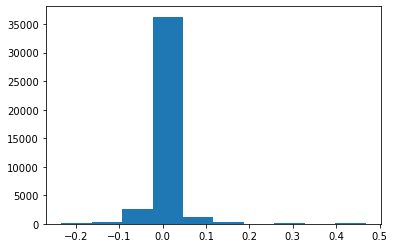

In [73]:
plt.hist(steer_angle)

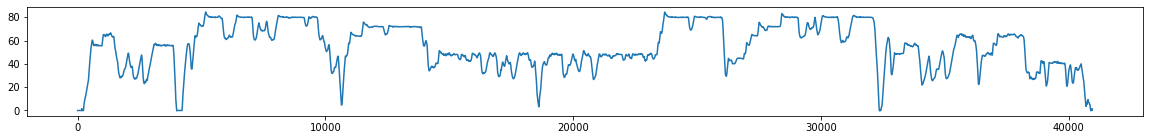

In [74]:
# speed
plt.figure(figsize=(20,2))
plt.plot(aux[:,2])

(array([1046.,  361.,  723., 3283., 4773., 8964., 3528., 5551., 5163.,
        7549.]),
 array([-0.322,  8.164, 16.66 , 25.14 , 33.62 , 42.12 , 50.6  , 59.1  ,
        67.56 , 76.06 , 84.56 ], dtype=float16),
 <BarContainer object of 10 artists>)

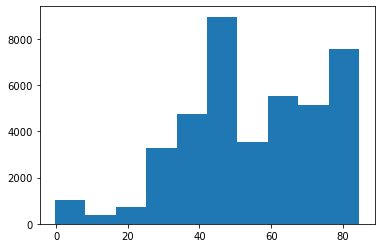

In [75]:
# speed
plt.hist(aux[:,2])

In [76]:
"""import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)
#fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[0, 12])
fig.show()
"""
# The speed you can go is a linear fn of sqrt(1/curvature), steer_angle is a linear fn of curvature, given wheelbase

'import plotly.express as px\nimport plotly.graph_objects as go\n\nfig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)\n#fig.update_xaxes(range=[0, 50])\nfig.update_yaxes(range=[0, 12])\nfig.show()\n'

In [77]:
MAX_ACCEL

0.6

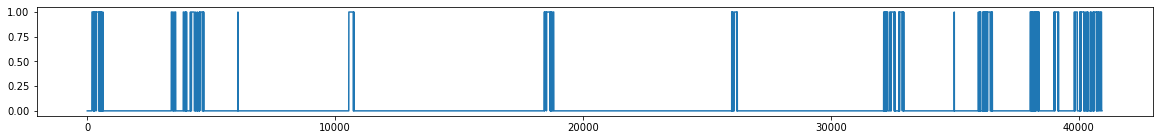

In [78]:
# steeringWheelPressed
plt.figure(figsize=(20,2))
plt.plot(car_state[:,4])

(array([19780213.,  2255612.,  6136619.,  8761156., 13561983., 18949511.,
        27879072., 34629394., 21322961.,  4009879.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

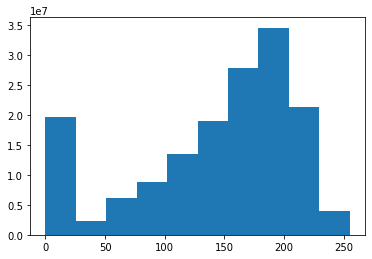

In [79]:
plt.hist(img[::20,:,:,2].flatten())

In [80]:
img.mean()

153.2512794143639

In [81]:
"""for i in range(len(img)):
    img[i] = gamma_correct_auto(img[i])"""

'for i in range(len(img)):\n    img[i] = gamma_correct_auto(img[i])'

<BarContainer object of 10 artists>

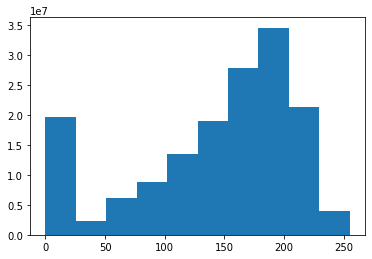

In [82]:
plt.hist(img[::20,:,:,2].flatten())[2]

In [83]:
"""for i in range(len(img)):
    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    
    aux[i, 2] = 80"""

'for i in range(len(img)):\n    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    \n    aux[i, 2] = 80'

In [84]:
img.shape

(40941, 120, 640, 3)

In [85]:
aux[:,0] = 0 #-1.0 #-.5
aux[:,1] = .5

In [86]:
rollout_data = make_vid(run_id, model_stem, img, aux)

(40941, 30) (40941, 1, 15, 80) (40941, 1, 15, 80)
240 690 3


/home/beans/bespoke/viz_utils.py:59: RuntimeWarning:

invalid value encountered in true_divide



Made vid!


In [87]:
wp_angles_all, wp_headings_all, wp_curvatures_all, obsnet_outs, cnn_activations, cnn_grads, rnn_activations, rnn_grads = rollout_data

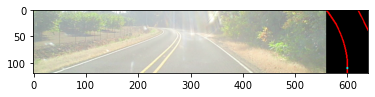

In [88]:
plt.imshow(img[11_800])

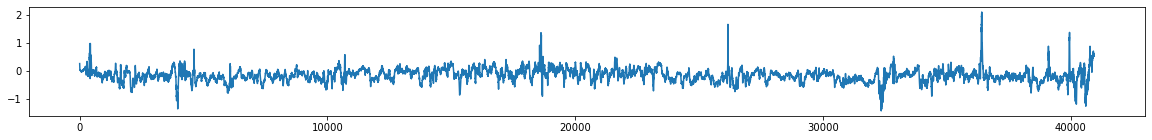

In [89]:
# pitch

plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,1])

In [90]:
obsnet_outs[:,1][:].mean()

-0.1602

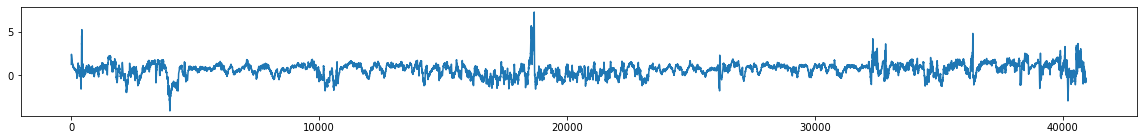

In [91]:
# yaw
plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,2])

In [92]:
obsnet_outs[:,2][:15_000].mean()

0.6396

In [47]:
%%time
combine_vids(model_stem, "9.21_avg", run_id)

combined!
CPU times: user 1min 16s, sys: 835 ms, total: 1min 17s
Wall time: 1min 17s
